In [ ]:
import pandas as pd
#change for Maja DANGER ZONE
# Load the CSV file
file_path = "/Users/mass/Downloads/final.csv"  # Replace with the path to your file
df = pd.read_csv(file_path)

# Drop rows with missing values
cleaned_df = df.dropna()

# Save the cleaned file
cleaned_file_path = "PCA_cleaned.csv"
cleaned_df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned file saved as {cleaned_file_path}")

Cleaned file saved as PCA_cleaned.csv


In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/Users/mass/Documents/Dokumente - mass MacBook Air/FibPho-Data/PCA_cleaned.csv')

(83, 45)
Index(['Mouse', 'Strain', 'Genotype', 'OFT - Total Distance moved (cm)',
       'OFT - Mean Velocity (cm/s)', 'OFT - Frequency Border Zone',
       'OFT - Total Time in Border Zone (sec)',
       'OFT - Latency to First Enter Border Zone (sec)',
       'OFT - Frequency Corner Zone', 'OFT - Total Time in Corner Zone (sec)',
       'OFT - Latency to First Enter Corner Zone (sec)',
       'OFT - Frequency Center Field',
       'OFT - Total Time in Center Field (sec)',
       'OFT - Latency to First Enter Center Field (sec)',
       'OFT - Frequency Border', 'OFT - Total Time in Border (sec)',
       'OFT - Latency to First Enter Border Zone (sec).1',
       'OFT - Total Time Moving (sec)', 'OFT - Total Time Not Moving (sec)',
       'OFT - Running Clockwise Body Axis Rotations',
       'OFT - Running Counter Clockwise Body Axis Rotation',
       'OFT - Running in Circles Body Axis Rotation ',
       'OFT - Frequency of Rearing', 'OFT - Total Time of Rearing (sec)',
       'OFT - 

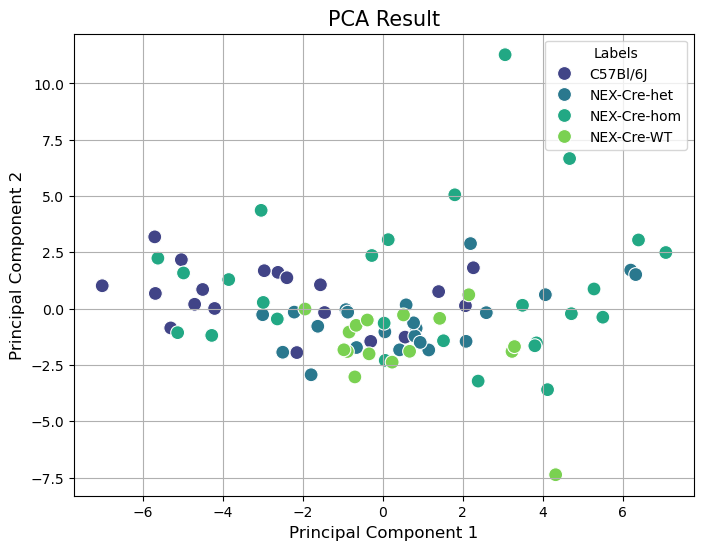

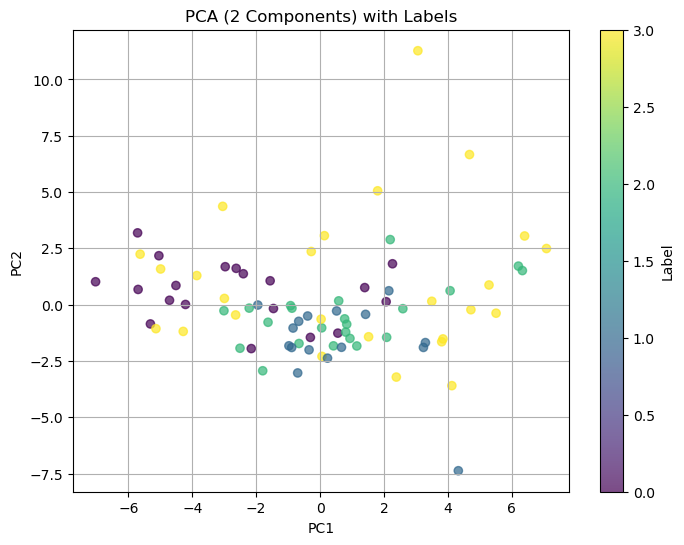

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned CSV file
#file_path = "/Users/mass/Downloads/PCA-only-OFT-cleaned.csv"  # Update with the path to your cleaned CSV file
#file_path = "/Users/mass/Downloads/PCA-only-OFT-cleaned.csv"  # Update with the path to your cleaned CSV file
#file_path = "/Users/mass/Downloads/PCA-only-OFT-cleaned-WT-hom-only.csv"  # Update with the path to your cleaned CSV file
#file_path = "/Users/mass/Downloads/PCA-only-OFT-cleaned-WT-het.csv"  # Update with the path to your cleaned CSV file
file_path = "/Users/mass/Downloads/nervt.csv"
#file_path = "/Users/mass/Downloads/WT-is-WT-NEX.csv"
df = pd.read_csv(file_path)
print(df.shape)  # Prints the number of rows and columns
print(df.columns)  # Prints the list of column names

# Assuming the columns are the features, not including the index or any categorical columns.
# Adjust indices as needed
#df_selected = df.iloc[:, [3, 4, 5, 6, 7, 8]]  # Adjust columns as needed
df_selected = df.iloc[:, [3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]  # Adjust columns as needed
X = df_selected

# Standardizing the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Set number of components to 2 for 2D visualization
pca_result = pca.fit_transform(X_scaled)

# Convert PCA result to DataFrame for easier plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Extract labels from the 3rd column (index 2) of the DataFrame
labels = df.iloc[:, 2]  # 3rd column has index 2 in Python (0-indexed)

# Add the label column to the DataFrame for coloring
pca_df['label'] = labels

# Plotting the PCA results with color based on labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, hue='label', palette='viridis')
plt.title('PCA Result', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Labels')
plt.savefig("mein_plot.svg", format="svg")
plt.show()

# Plot als SVG speichern

# Scatter plot with color based on the label (with color bar)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['label'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2 Components) with Labels')
plt.colorbar(label='Label')  # Color bar for label
plt.grid(True)
plt.show()


In [ ]:
print(f"Explained variance ratio by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance ratio by PC2: {pca.explained_variance_ratio_[1]:.2f}")
print(f"Total variance explained by PC1 and PC2: {np.sum(pca.explained_variance_ratio_[:2]):.2f}")


In [ ]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette:.2f}")


In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Index: {ch_score}")


t-SNE


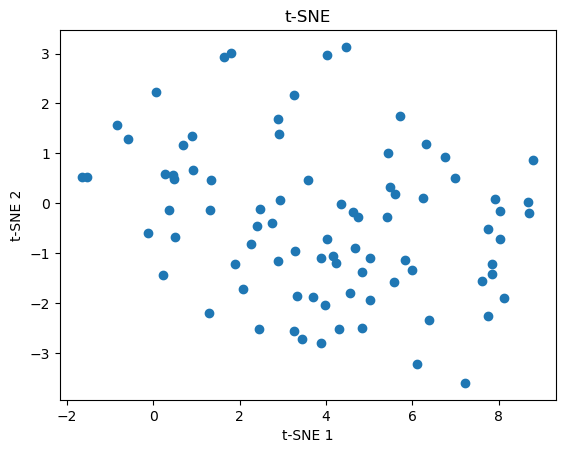

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming your data is in a variable 'X' (e.g., a NumPy array or a Pandas DataFrame)

# Step 1: Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)  # You can change n_components to 3 for 3D
X_tsne = tsne.fit_transform(X_scaled)

# Step 2: Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.show()


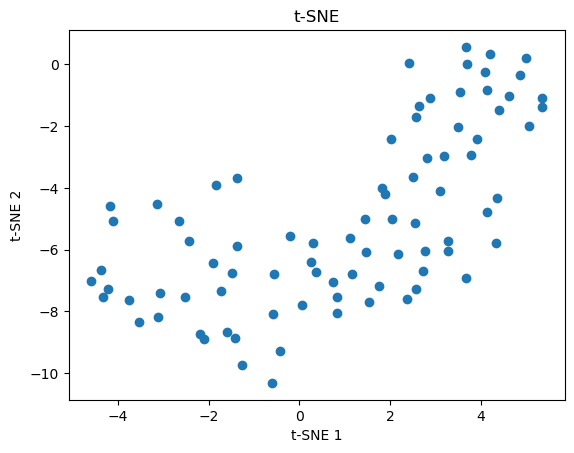

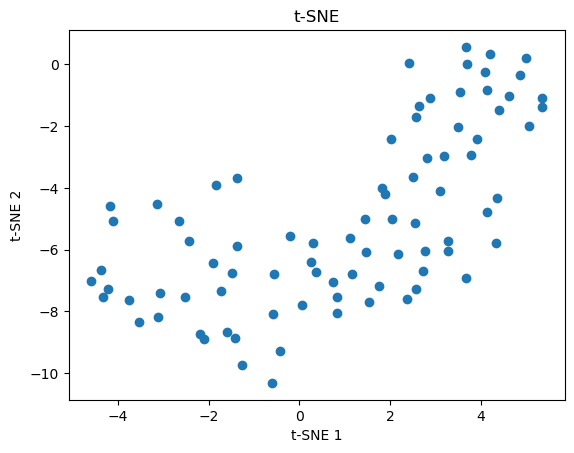

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming pca_result is the PCA-reduced data with 2 or 3 components
# If pca_result is raw data (not PCA), you should scale it
# If pca_result is already PCA-transformed, you can skip scaling

# If raw data (untransformed)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 1: Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)  # For 2D plot, use n_components=2
X_tsne = tsne.fit_transform(pca_result)  # Use the PCA result (or scaled data)

# Step 2: Plot the t-SNE results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.show()

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming pca_result is the PCA-reduced data with 2 or 3 components
# If pca_result is raw data (not PCA), you should scale it
# If pca_result is already PCA-transformed, you can skip scaling

# If raw data (untransformed)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 1: Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)  # For 2D plot, use n_components=2
X_tsne = tsne.fit_transform(pca_result)  # Use the PCA result (or scaled data)

# Step 2: Plot the t-SNE results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.show()


(83, 2)


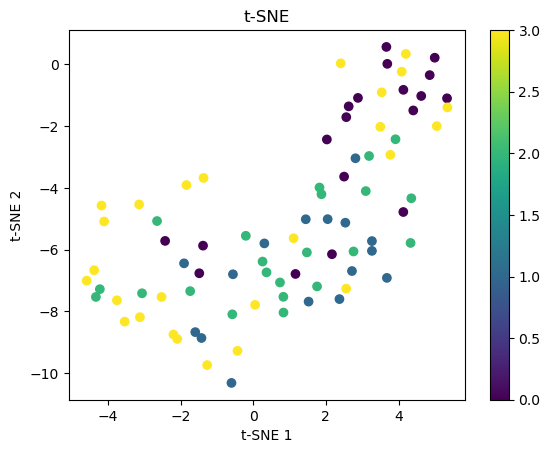

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Check if pca_result is defined and has valid data
# Ensure pca_result is a 2D array with valid numerical data
print(pca_result.shape)  # This will output the shape of the PCA data (ensure it's not empty)

# Assuming labels are in the third column of df
labels = df.iloc[:, 2]  # 3rd column, index 2 in Python (0-indexed)

# Encode the labels
le = LabelEncoder()
y_labels_encoded = le.fit_transform(labels)

# Step 1: Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)  # For 2D plot, use n_components=2
X_tsne = tsne.fit_transform(pca_result)  # Use the PCA result (or scaled data)

# Step 2: Plot the t-SNE results, with points colored by their class labels
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_labels_encoded, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar()  # Show color scale for class labels

# Save the figure as SVG using plt.savefig()
plt.savefig("t-SNE.svg", format="svg", bbox_inches="tight")

# Optionally show the plot (useful for interactive environments)
plt.show()


k.means clustering PCA data

/Users/mass/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


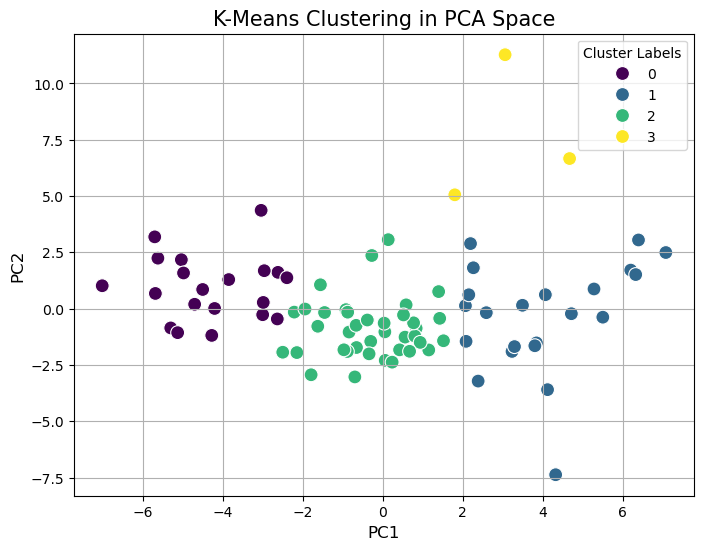

In [18]:
from sklearn.cluster import KMeans

# Fit KMeans clustering model with the desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

# Plot the clusters found by K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering in PCA Space', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(True)
plt.legend(title='Cluster Labels')

# Save the figure as SVG using plt.savefig()
plt.savefig("K-means.svg", format="svg", bbox_inches="tight")

# Optionally show the plot (useful for interactive environments)
plt.show()

K means clustering original data

/Users/mass/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


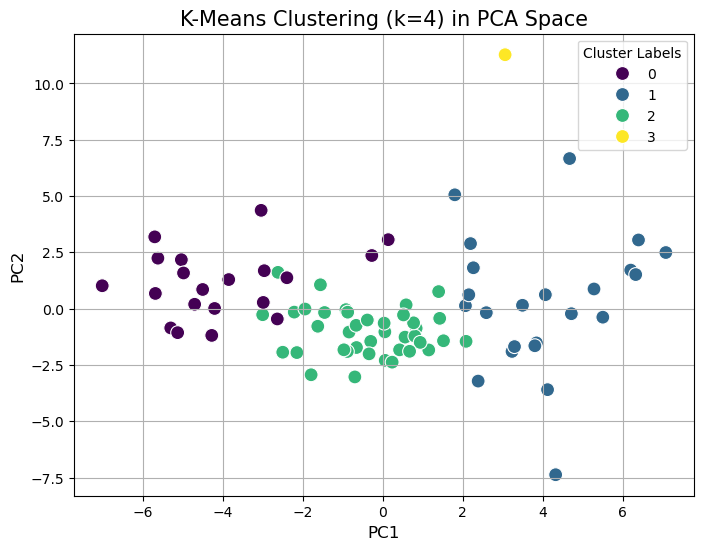

Silhouette Score: 0.13
Calinski-Harabasz Index: 12.07


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_scaled' is the scaled data, which is the same as your original data scaled using StandardScaler

# Step 1: Apply K-means clustering
n_clusters = 4  # You can change this number based on your data (e.g., 2, 3, etc.)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 2: Plot the PCA results with K-means cluster labels
# Using PCA result for better visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, hue=kmeans_labels, palette='viridis')
plt.title(f'K-Means Clustering (k={n_clusters}) in PCA Space', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(True)
plt.legend(title='Cluster Labels')
plt.show()

# Step 3: Evaluate the clustering using silhouette score
silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score: {silhouette:.2f}")

# Step 4: Evaluate the clustering using Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, kmeans_labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")


Support Vector Machine


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare your features (X) and labels (y)
# X_scaled is already standardized
X = X_scaled  # Scaled features
y = labels  # Your labels from the 3rd column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # RBF kernel is default
svm_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


optimized code for SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# Standard SVM Modell
svm = SVC()

# Parameter für das Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularisierungsparameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel-Typ
    'gamma': ['scale', 'auto', 0.1, 1],   # Gamma für nicht-lineare Kernel
    'class_weight': [None, 'balanced']    # Gewichtung der Klassen
}

# Grid Search mit Cross-Validation
cv = StratifiedKFold(n_splits=5)  # 5-fache Cross-Validation
grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
#classes = ['C57Bl/6J', 'NEX-Cre-WT', 'NEX-Cre-het', 'NEX-Cre-hom']
classes = ['C57Bl/6J',  'NEX-Cre-het', 'NEX-Cre-hom']
# Beste Parameter
print("Beste Parameter:", grid_search.best_params_)

# Modell mit besten Parametern
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Klassifikationsbericht
print("Optimierte SVM Ergebnisse:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix (Optimized SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Cros validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Laden der Daten
data_path = '/Users/mass/Downloads/nervt.csv'  # Pfad zu deinen Daten
df = pd.read_csv(data_path)

# Zielvariable definieren
y = df['Genotype']

# Features auswählen (entferne nicht-numerische Spalten oder Zielspalten)
X = df.drop(columns=['Mouse','Strain','Genotype'])

# Standardisierung der Merkmale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameter für das Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularisierungsparameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel-Typ
    'gamma': ['scale', 'auto', 0.1, 1],   # Gamma für nicht-lineare Kernel
    'class_weight': [None, 'balanced']    # Gewichtung der Klassen
}

# Grid Search mit Cross-Validation
cv = StratifiedKFold(n_splits=5)  # 5-fache Cross-Validation
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_scaled, y)

# Beste Parameter anzeigen
print("Beste Parameter:", grid_search.best_params_)

# Modell mit besten Parametern
best_svm = grid_search.best_estimator_

# Cross-Validation mit dem besten Modell
cv_scores = cross_val_score(best_svm, X_scaled, y, cv=5, scoring='accuracy')
print("\nCross-Validation Scores mit optimiertem Modell:", cv_scores)
print("Durchschnittliche Genauigkeit:", cv_scores.mean())

# Split der Daten für detaillierte Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

# Detaillierter Bericht auf Testdaten
print("\nDetaillierter Bericht auf Testdaten:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
target_classes = y.unique()  # Zielklassen dynamisch aus den Daten ermitteln
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
plt.title('Confusion Matrix (Optimiertes SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Confusion matrix für alle Crossvalideirungen

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Liste zur Speicherung aller Confusion-Matrices
all_conf_matrices = []

# Cross-Validation und Confusion-Matrix für alle Folds berechnen
for train_index, test_index in cv.split(X_scaled, y):
    # Trainings- und Testdaten für diesen Fold
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # SVM-Modell für diesen Fold trainieren
    svm_fold = SVC(**grid_search.best_params_)  # Beste Parameter für jedes Modell verwenden
    svm_fold.fit(X_train_fold, y_train_fold)

    # Vorhersagen und Confusion-Matrix speichern
    y_pred_fold = svm_fold.predict(X_test_fold)
    fold_conf_matrix = confusion_matrix(y_test_fold, y_pred_fold, labels=y.unique())
    all_conf_matrices.append(fold_conf_matrix)

# Aggregierte Confusion-Matrix berechnen
aggregated_conf_matrix = np.sum(all_conf_matrices, axis=0)

# Confusion-Matrix visualisieren
target_classes = y.unique()
sns.heatmap(aggregated_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
plt.title('Aggregierte Confusion Matrix (Alle Modelle)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion.svg", format="svg")
plt.show()

# Optional: Individuelle Confusion-Matrices anzeigen
for i, conf_matrix in enumerate(all_conf_matrices, start=1):
    print(f"Confusion Matrix für Fold {i}:")
    print(conf_matrix)


Mean accuracy für alle

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Liste zur Speicherung der Accuracy-Werte
all_accuracies = []

# Cross-Validation und Accuracy für alle Folds berechnen
for train_index, test_index in cv.split(X_scaled, y):
    # Trainings- und Testdaten für diesen Fold
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # SVM-Modell für diesen Fold trainieren
    svm_fold = SVC(**grid_search.best_params_)  # Beste Parameter für jedes Modell verwenden
    svm_fold.fit(X_train_fold, y_train_fold)

    # Vorhersagen
    y_pred_fold = svm_fold.predict(X_test_fold)

    # Accuracy berechnen
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    all_accuracies.append(fold_accuracy)

    print(f"Accuracy für Fold: {fold_accuracy:.4f}")

# Durchschnittliche Accuracy berechnen
mean_accuracy = np.mean(all_accuracies)
std_accuracy = np.std(all_accuracies)

print("\nAccuracy für alle Modelle:")
print(f"Durchschnittliche Accuracy: {mean_accuracy:.4f}")
print(f"Standardabweichung der Accuracy: {std_accuracy:.4f}")


Chance-Rate

In [ ]:
# Häufigkeit der Klassen im Ziel
class_counts = y.value_counts()
most_frequent_class_rate = class_counts.max() / len(y)

print(f"Chance-Rate (häufigste Klasse): {most_frequent_class_rate:.4f}")


Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

# Dummy-Modell, das die häufigste Klasse wählt
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_accuracy = cross_val_score(dummy_clf, X_scaled, y, cv=5, scoring="accuracy").mean()

print(f"Chance-Rate basierend auf einem Dummy-Modell: {dummy_accuracy:.4f}")


In [ ]:
from scipy.stats import binom_test

# Anzahl der korrekten Vorhersagen und Gesamtanzahl
correct_predictions = int(mean_accuracy * len(y))  # Durchschnittliche korrekte Vorhersagen
total_predictions = len(y)  # Gesamtanzahl der Vorhersagen

# Binomialtest gegen die Chance-Rate
p_value = binom_test(correct_predictions, total_predictions, p=most_frequent_class_rate, alternative='greater')

print(f"Binomialtest p-Wert: {p_value:.4f}")
if p_value < 0.05:
    print("Das Modell liegt signifikant über der Zufallsrate (above chance).")
else:
    print("Das Modell liegt nicht signifikant über der Zufallsrate.")


Bootstrap

In [ ]:
n_bootstrap = 1000
bootstrap_differences = []

for _ in range(n_bootstrap):
    # Sample aus der Anzahl der Folds ziehen
    sample_indices = np.random.choice(len(all_accuracies), len(all_accuracies), replace=True)
    bootstrap_accuracy = np.mean([all_accuracies[i] for i in sample_indices])
    bootstrap_differences.append(bootstrap_accuracy - most_frequent_class_rate)

# Konfidenzintervall berechnen
ci_lower = np.percentile(bootstrap_differences, 2.5)
ci_upper = np.percentile(bootstrap_differences, 97.5)

print(f"Konfidenzintervall für den Unterschied zwischen Modellgenauigkeit und Chance-Rate: [{ci_lower:.4f}, {ci_upper:.4f}]")
if ci_lower > 0:
    print("Das Modell liegt signifikant über der Zufallsrate.")
else:
    print("Das Modell liegt nicht signifikant über der Zufallsrate.")


Accuracy score mean

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Liste zur Speicherung der Accuracy-Werte
all_accuracies = []

# Cross-Validation und Accuracy für alle Folds berechnen
for train_index, test_index in cv.split(X_scaled, y):
    # Trainings- und Testdaten für diesen Fold
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # SVM-Modell für diesen Fold trainieren
    svm_fold = SVC(**grid_search.best_params_)  # Beste Parameter für jedes Modell verwenden
    svm_fold.fit(X_train_fold, y_train_fold)

    # Vorhersagen
    y_pred_fold = svm_fold.predict(X_test_fold)

    # Accuracy berechnen
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    all_accuracies.append(fold_accuracy)

    print(f"Accuracy für Fold: {fold_accuracy:.4f}")

# Durchschnittliche Accuracy berechnen
mean_accuracy = np.mean(all_accuracies)
std_accuracy = np.std(all_accuracies)

print("\nAccuracy für alle Modelle:")
print(f"Durchschnittliche Accuracy: {mean_accuracy:.4f}")
print(f"Standardabweichung der Accuracy: {std_accuracy:.4f}")


SHAP angepasst auf Code Cross validation

In [ ]:
# Stelle sicher, dass probability=True gesetzt ist
svm = SVC(probability=True)  # probability=True für SHAP erforderlich
grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_scaled, y)

# Modell mit besten Parametern
best_svm = grid_search.best_estimator_


Da das SV Model nicht linear ist müssen, sondern rbf müsssen wir SHAP machen

In [ ]:
pip install shap


In [ ]:
proba = best_svm.predict_proba(X_scaled[:5])
print(f"Shape of probabilities: {proba.shape}")
print(proba)


In [ ]:
# Zielklasse definieren
class_label = "C57Bl/6J"  # Beispiel: Klasse, die du analysieren möchtest

# Maske für Tiere der Zielklasse
class_mask = (y == class_label)  # Boolean-Maske
X_scaled_class = X_scaled[class_mask]  # Nur numerische Werte für die Zielklasse


In [ ]:
print(y.unique())  # Zeigt alle Klassen in `y`


In [ ]:
shap_values_class = np.array(shap_values[class_index])[class_mask]


In [ ]:
# Beispiel: Explainer für die Zielklasse
explainer = shap.KernelExplainer(lambda X: best_svm.predict_proba(X)[:, list(y.unique()).index(class_label)], X_scaled[:100])

# SHAP-Werte berechnen für die gefilterte Klasse
shap_values_class = explainer.shap_values(X_scaled_class)


SHAP

In [ ]:
import shap
import matplotlib.pyplot as plt
shap.summary_plot(shap_values_class, X_scaled_class, feature_names=feature_names)
# Plot als SVG speichern# Speichern der aktuellen Matplotlib-Figur
fig = plt.gcf()  # Get current figure
fig.savefig("shap_summary_plot.svg", format="svg", bbox_inches="tight")
plt.savefig("SHAP-NEX-hom.svg", format="svg", bbox_inches="tight")
# Plot anzeigen (optional)
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP Summary Plot erstellen
shap.summary_plot(shap_values_class, X_scaled_class, feature_names=feature_names, show=False)

# Sicherstellen, dass der aktuelle Plot gespeichert wird
plt.savefig("shap_summary_WT.svg", format="svg", bbox_inches="tight")

# Optional: Plot anzeigen
plt.show()


In [ ]:
# Feature-Namen aus dem ursprünglichen DataFrame extrahieren
feature_names = df.drop(columns=['Mouse', 'Strain', 'Genotype']).columns  # Passe dies an deine Datenstruktur an

# Globale Feature-Wichtigkeit visualisieren
shap.summary_plot(shap_values, X_scaled, feature_names=feature_names)


In [ ]:
# Feature-Wichtigkeit für eine spezifische Klasse (z. B. Klasse 1)
shap.summary_plot(shap_values[1], X_scaled, feature_names=feature_names)


PCA with 3 components

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the cleaned CSV file
file_path = "/Users/mass/Downloads/nervt.csv"  # Update with the path to your cleaned CSV file
df = pd.read_csv(file_path)

# Select the relevant columns (adjust indices as needed)
df_selected = df.iloc[:, [3, 4, 5, 6, 7, 8 ]]  # Adjust columns as needed
X = df_selected

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

# Convert PCA result to DataFrame for easier plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Extract labels from the 3rd column of the DataFrame (index 2)
labels = df.iloc[:, 2]  # 3rd column (index 2)

# Add the label column to the DataFrame for coloring
pca_df['label'] = labels

# 3D plot of PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D with color based on labels
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['label'].astype('category').cat.codes, cmap='viridis', alpha=0.7)

# Set labels for the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Title and color bar
plt.title('PCA (3 Components) with Labels')
fig.colorbar(scatter, label='Label')  # Adding a color bar to indicate labels

plt.show()


3D animated plot PA3 components

In [ ]:
pip install plotly

In [ ]:

import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned CSV file
file_path = "/Users/mass/Downloads/nervt.csv"  # Update with the path to your cleaned CSV file
df = pd.read_csv(file_path)

# Select the relevant columns (adjust indices as needed)
df_selected = df.iloc[:, [3, 4, 5, 6, 7, 8]]  # Adjust columns as needed
X = df_selected

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

# Convert PCA result to DataFrame for easier plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Extract labels from the 3rd column of the DataFrame (index 2)
labels = df.iloc[:, 2]  # 3rd column (index 2)

# Add the label column to the DataFrame for coloring
pca_df['label'] = labels

# Create interactive 3D scatter plot using Plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='label', title='PCA (3 Components) with Labels', 
                    color_continuous_scale='viridis', labels={'label': 'Label'})

# Show the plot
fig.show()


t-SNE


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming your PCA result is stored in 'pca_result'
X_pca = pca_result  # PCA-transformed data, use this for t-SNE

# Step 1: Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)  # You can change n_components to 3 for 3D
X_tsne = tsne.fit_transform(X_pca)

# Assuming your labels are in the 3rd column of the original DataFrame (index 2)
labels = df.iloc[:, 2]  # Extract labels from the 3rd column

# Convert the labels to categorical codes for numeric color mapping
labels_encoded = labels.astype('category').cat.codes

# Step 2: Plot the results with labels (color-coded)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_encoded, cmap='viridis', alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar(scatter, label='Labels')  # Adding a color bar to indicate labels
plt.show()
